In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

In [13]:
import os
path = os.getcwd()

In [14]:
color_raw = o3d.io.read_image(
    path + '/2011_09_26_drive_0002_sync_image_0000000005_image_02.png')
# color_raw = o3d.io.read_image(
#     '/Users/kantaphat/Downloads/ECE4500J/VE450/Plot/2011_09_26_drive_0002_sync_image_0000000005_image_02.png')
print(color_raw)

Image of size 1216x352, with 3 channels.
Use numpy.asarray to access buffer data.


In [15]:
depth_raw = o3d.io.read_image(
    path + '/2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png')
print(depth_raw)

Image of size 1216x352, with 1 channels.
Use numpy.asarray to access buffer data.


In [16]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw, depth_trunc=30.0 ,convert_rgb_to_intensity=False)

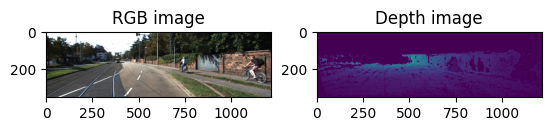

In [18]:
plt.subplot(1, 2, 1)
plt.title('RGB image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
    )
)
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries(
    [pcd],
    width=2000,
    height=1200,
    point_show_normal=True,
    mesh_show_wireframe=True,
    mesh_show_back_face=True
)